Class to allow epochs of AlignMNIST to be iterated over and loaded into Tensorflow notebooks

http://www2.compute.dtu.dk/~sohau/augmentations/

In [1]:
import numpy as np

class AlignMNIST(object):

    def __init__(self, filename='alignmnist.npz'):
        self._alignmnist_start = 0
        self._alignmnist_stop =  self._alignmnist_start + 60000           
        self._data = np.load(filename, mmap_mode='r')
        
    # does not work
    def dense_to_one_hot(self, labels_dense, num_classes=10):
        """Convert class labels from scalars to one-hot vectors."""
        num_labels = labels_dense.shape[0]
        index_offset = np.arange(num_labels) * num_classes
        labels_one_hot = np.zeros((num_labels, num_classes))
        labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
        return labels_one_hot
    
    def reshape_images(self, images):
        #print images.shape[0], images.shape[1] * images.shape[2]
        images = images.reshape(images.shape[0], images.shape[1] * images.shape[2])
        # Convert from [0, 255] -> [0.0, 1.0].
        images = images.astype(np.float32)
        images = np.multiply(images, 1.0 / 255.0)
        return images
        
    def shuffle_epoch(self, images, labels):   
        num = labels.shape[0]
        pids = np.arange(num)
        np.random.shuffle(pids)
        images, labels = images[pids], labels[pids]
        return images, labels

    # we could also just use all the data instead of 55,000
    # but the first epoch is always the original data set
    def next_epoch(self):

        x = self._data['x']
        x = x[self._alignmnist_start:self._alignmnist_stop,:,:]
        y = self._data['y']
        y = y.astype(int)
        y = y[self._alignmnist_start:self._alignmnist_stop]
        
        self._alignmnist_start += 60000
        self._alignmnist_stop += 60000

        #print x.shape, y.shape
        x = self.reshape_images(x)
        y = self.dense_to_one_hot(y)
        #print x.shape, y.shape
                
        x_train, y_train = x[0:55000,:], y[0:55000]
        x_test, y_test = x[55000:60000,:], y[55000:60000]

        #print x_train.shape, y_train.shape, x_test.shape, y_test.shape
        x_train, y_train = self.shuffle_epoch(x_train,y_train)
        #print x_train.shape, y_train.shape, x_test.shape, y_test.shape
        
        return x_train, y_train, x_test, y_test


In [2]:
a = AlignMNIST()

In [3]:
x_train, y_train, x_test, y_test = a.next_epoch()

In [4]:
print x_train.shape, y_train.shape, x_test.shape, y_test.shape

(55000, 784) (55000, 10) (5000, 784) (5000, 10)


In [5]:
from matplotlib import pyplot
import matplotlib as mpl
%matplotlib inline  

def show(image): 
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


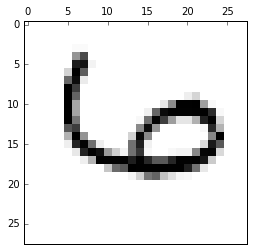

In [ ]:
image = x_train[0,:]
image = image.reshape(28,28)
print y_train[0]
show(image)

In [ ]:
for i in range(75):
    x_train, y_train, x_test, y_test = a.next_epoch()
    print i, x_train.shape, y_train.shape, x_test.shape, y_test.shape

0 (55000, 784) (55000, 10) (5000, 784) (5000, 10)
1 (55000, 784) (55000, 10) (5000, 784) (5000, 10)
2 (55000, 784) (55000, 10) (5000, 784) (5000, 10)
3 (55000, 784) (55000, 10) (5000, 784) (5000, 10)
